<a href="https://colab.research.google.com/github/waelrash1/forecastingmodelsPY/blob/main/CH04/CH04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling a moving average process

* Defining a moving average process
* Using the ACF to identify the order of a moving average process
* Forecasting a time series using the moving average model

> **Random Walk**
* A random walk process as a series whose first difference is stationary with no autocorrelation.
* This means that plotting its $ACF$ will show no significant coefficients after lag $0$.
* However, it is possible that a stationary process may still exhibit autocorrelation.
* In this case, we have a time series that can be approximated by a moving average model $MA(q)$, an autoregressive model $AR(p)$, or an autoregressive moving average model $ARMA(p,q)$.

In [90]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## forecast the volume of widget sales
Suppose that you want to forecast the volume of widget sales from the XYZ Widget
Company. By predicting futures sales, the company will be able to better manage
its production of widgets and avoid producing too many or too few.
* If not enough widgets are produced, the company will not be able to meet their clients’demands, leaving customers unhappy.  
* On the other hand, producing too many widgets will increase inventory. The widgets might become obsolete or lose their value, which will increase the business’s liabilities, ultimately making shareholders unhappy

In [91]:
data_url='https://raw.githubusercontent.com/waelrash1/timeSeriesPy/master/data/widget_sales.csv'

df = pd.read_csv(data_url)

df.head()

,widget_sales
0,50.496714
1,50.805493
2,51.477758
3,53.542228
4,54.873108


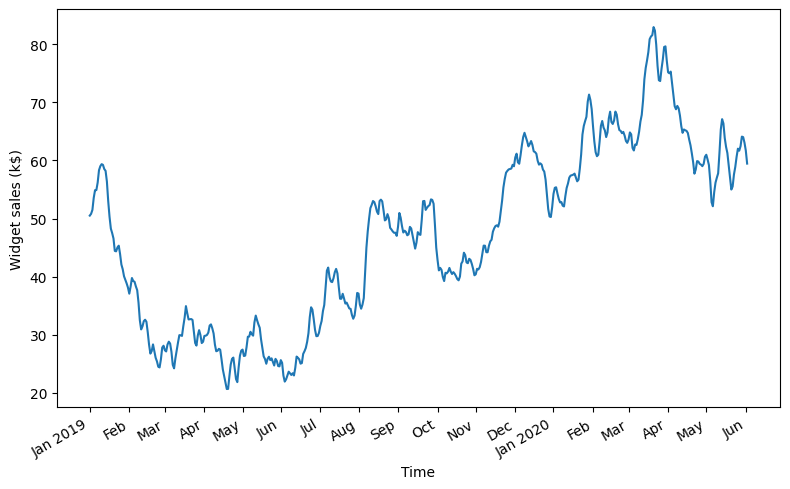

In [92]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(df['widget_sales'])
ax.set_xlabel('Time')
ax.set_ylabel('Widget sales (k$)')

plt.xticks(
    [0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409, 439, 468, 498],
    ['Jan 2019', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH04_F01_peixeiro.png', dpi=300)

> In order to forecast the volume of widget sales, we need to identify the underlying
process. To do so, we will apply the same steps that we covered when
working with a random walk process.



## Moving average process

* In a moving average $(MA)$ process, the current value depends linearly on the mean of the series, the current error term, and past error terms.
* The moving average model is denoted as $MA(q)$, where q is the order. The general expression of an $MA(q)$ model is


$$
\Large y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} +⋅⋅⋅+ \theta_q \epsilon_{t-q}
$$



### Moving average process $MA(q=1)$


* If $q=1$ The moving average model is denoted as $MA(1)$, The  expression of an $MA(1)$ model is


$$
\Large y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1}
$$

### Moving average process $MA(q=2)$
* If $q=1$ The moving average model is denoted as $MA(1)$, The  expression of an $MA(1)$ model is
$$
\Large y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2}
$$

## Simulate a $MA(q)$ process


In [93]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [94]:
np.random.seed(42)
# [1, 0.9,0.3,0.5,0.4]
ma2 = np.array([1, 0.9,0.3,0.5,0.4])
ar2 = np.array([1, 0])

MA2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)
ADF_result = adfuller(MA2_process)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')


ADF Statistic: -9.46999220957228
p-value: 4.1309148302378723e-16


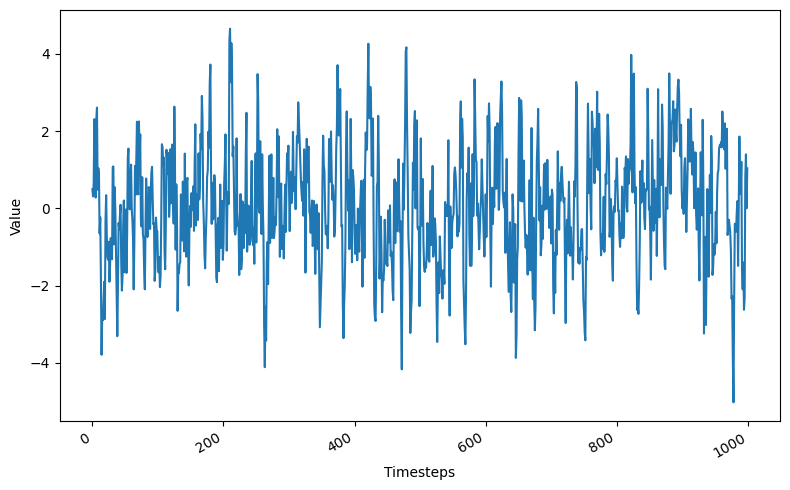

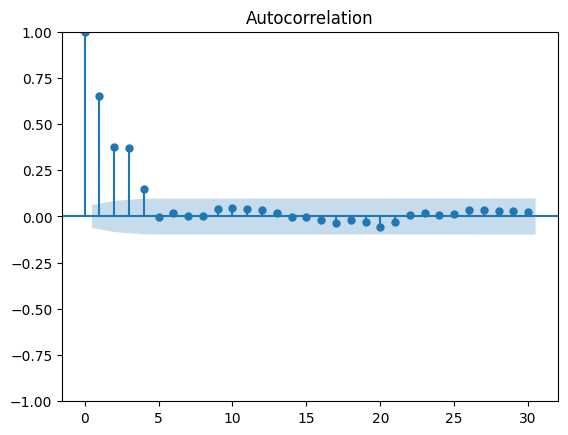

In [95]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(MA2_process)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

fig.autofmt_xdate()
plt.tight_layout()


# ACF function
plot_acf(MA2_process, lags=30);


## Identifying the order of a moving average process
* To identify the order of a moving average process, we can extend the steps needed to identify a random walk,



## Perform ADF test

In [96]:

# Import the required module to perform ADF test
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the 'widget_sales' column of the 'df' dataframe
ADF_result = adfuller(df['widget_sales'])

# Print the ADF statistic obtained from the ADF test
print(f'ADF Statistic: {ADF_result[0]}')

#Print the p-value obtained from the ADF test
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -1.5121662069359048
p-value: 0.5274845352272605


> This results in an ADF statistic of -1.51 and a p-value of 0.53. Here, the ADF statistic is not a large negative number, and the p-value is greater than 0.05. Therefore, our time series is not stationary, and we must apply transformations to make it stationary.


### Apply 1st difference transformation
In order to make our series stationary, we will try to stabilize the trend by applying
a first-order differencing. We can do so by using the diff method from the numpy
library. Remember that this method takes in a parameter n that specifies the order of
differencing. In this case, because it is a first-order differencing, $n$ will be equal to $1$.

In [97]:
widget_sales_diff = np.diff(df['widget_sales'], n=1)

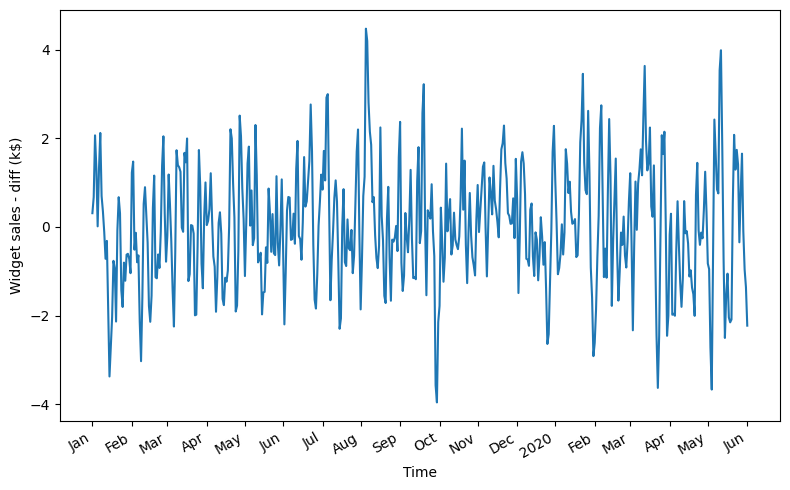

In [98]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot( widget_sales_diff)
ax.set_xlabel('Time')
ax.set_ylabel('Widget sales - diff (k$)')

plt.xticks(
    [0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409, 439, 468, 498],
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH04_F05_peixeiro.png', dpi=300)

In [99]:
ADF_result = adfuller(widget_sales_diff)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -10.576657780341959
p-value: 7.076922818587193e-19


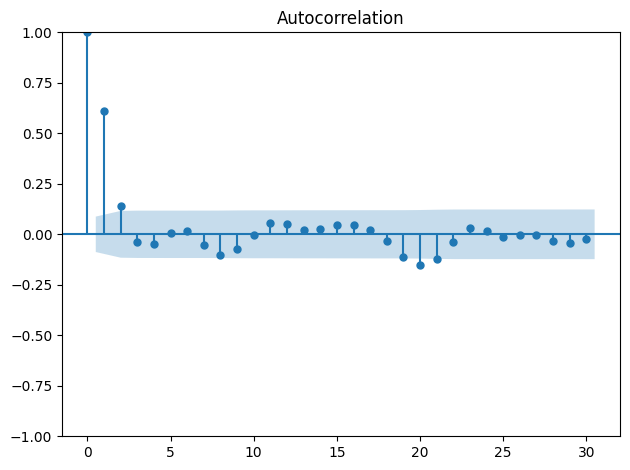

In [100]:
plot_acf(widget_sales_diff, lags=30);

plt.tight_layout()

plt.savefig('figures/CH04_F06_peixeiro.png', dpi=300)



> $ACF$ plot of the differenced series. Notice how the coefficients are
significant up until lag $2$, and then they fall abruptly into the non-significance zone (shaded area) of the plot. There are some significant coefficients around lag $20$,but this is likely due to chance, since they are non-significant between lags $3$ and $20$ and after lag $20$.

## Forecasting a moving average process
* Once the order $q$ of the moving average process is identified, we can fit the model to our training data and start forecasting.
* In our case, we discovered that the differenced volume of widget sales is a moving average process of order $2$, or an $MA(2)$ process.

* The moving average model assumes stationarity, meaning that our forecasts must be done on a stationary time series.
* Therefore, we will train and test our model on the differenced volume of widget sales.
* We will try two naive forecasting techniques and fit a second-order moving average model. The naive forecasts will serve as baselines to evaluate the performance of the moving average model, which we expect to be better than the baselines, since we previously identified our process to be a moving average process of order 2.

### Split data into training and testing

In [101]:
df_diff = pd.DataFrame({'widget_sales_diff': widget_sales_diff})

train = df_diff[:int(0.9*len(df_diff))]
test = df_diff[int(0.9*len(df_diff)):]

print(len(train))
print(len(test))

449
50


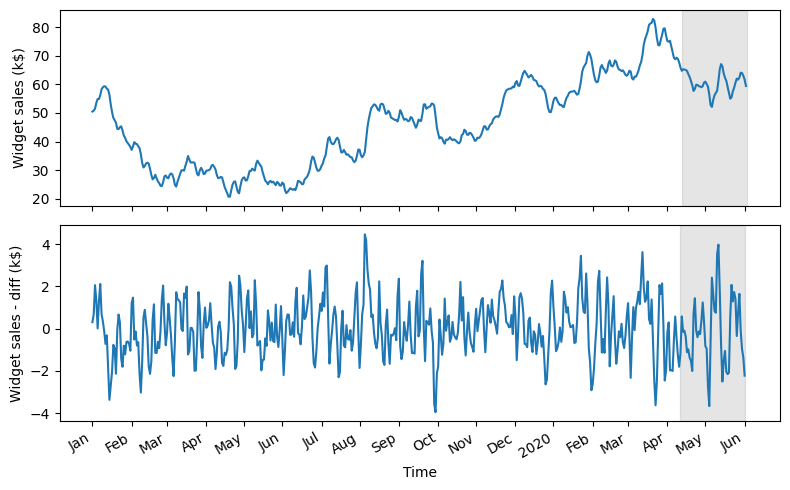

In [102]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8,5))

ax1.plot(df['widget_sales'])
ax1.set_xlabel('Time')
ax1.set_ylabel('Widget sales (k$)')
ax1.axvspan(450, 500, color='#808080', alpha=0.2)

ax2.plot(df_diff['widget_sales_diff'])
ax2.set_xlabel('Time')
ax2.set_ylabel('Widget sales - diff (k$)')
ax2.axvspan(449, 498, color='#808080', alpha=0.2)

plt.xticks(
    [0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409, 439, 468, 498],
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH04_F07_peixeiro.png', dpi=300)

### Applying $MA(2)$

In [103]:

model = SARIMAX(df_diff[:449], order=(0,0,2))
res = model.fit(disp=False) # Train the models


print(res.summary())

                               SARIMAX Results                                
Dep. Variable:      widget_sales_diff   No. Observations:                  449
Model:               SARIMAX(0, 0, 2)   Log Likelihood                -624.205
Date:                Sun, 18 Feb 2024   AIC                           1254.409
Time:                        23:28:08   BIC                           1266.730
Sample:                             0   HQIC                          1259.266
                                - 449                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.8627      0.048     17.904      0.000       0.768       0.957
ma.L2          0.2532      0.049      5.139      0.000       0.157       0.350
sigma2         0.9425      0.060     15.835      0.0



## **Interpretation**
The SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous factors) results you've shared provide detailed information about the statistical model used to forecast the sales of widgets, focusing on the differenced sales data (`widget_sales_diff`). Here's an interpretation of the key parts of the output:

- **Model**: SARIMAX(0, 0, 2) indicates that the model is a seasonal ARIMA model without autoregressive (AR) terms (i.e., AR order of 0), no differencing (i.e., Integrated order of 0), and with two moving average (MA) terms. This model does not explicitly mention seasonal components, which suggests that either seasonal effects were not considered significant for this dataset, or they were not included in this specific model configuration.

- **Dep. Variable**: The dependent variable `widget_sales_diff` suggests that the model is using differenced sales data, likely to stabilize the mean of the time series or to remove trends and seasonality.

- **Log Likelihood**: The log likelihood value of -624.205 measures how well the model fits the data. Higher values indicate a better fit.

- **AIC/BIC/HQIC**: These are information criteria values used to compare models. The Akaike Information Criterion (AIC) is 1254.409, the Bayesian Information Criterion (BIC) is 1266.730, and the Hannan-Quinn Information Criterion (HQIC) is 1259.266. Lower values indicate a better model fit with a good balance of model complexity and goodness of fit.

- **No. Observations**: The number of observations is 449, indicating the size of the dataset used for modeling.

- **Covariance Type**: 'opg' suggests the optimizer used 'outer product of gradients' for estimating model parameters, which is a method for handling potentially non-stationary time series data.

- **Coefficients**:
  - `ma.L1` and `ma.L2` coefficients (0.8627 and 0.2532, respectively) represent the parameters of the first and second MA terms. Their significance is confirmed by the P-values (< 0.05), indicating they are statistically significant predictors of the differenced widget sales.
  - The `sigma2` represents the variance of the model's residuals, estimated to be 0.9425. A smaller sigma2 suggests better model performance.

- **Statistical Tests**:
  - **Ljung-Box Test**: The Prob(Q) value of 0.84 for Ljung-Box test suggests that there is no significant autocorrelation in the model residuals at lag 1, indicating a good model fit.
  - **Jarque-Bera Test**: The Prob(JB) value of 0.21 indicates that the residuals are fairly normally distributed since this value is higher than 0.05, suggesting no significant deviation from normality.
  - **Heteroskedasticity Test**: The Prob(H) value of 0.85 indicates there is no significant heteroskedasticity, meaning the variance of the residuals does not significantly change over time.

- **Descriptive Statistics**:
  - **Skew**: The skewness of 0.15 suggests the residuals distribution is slightly skewed to the right but is close to symmetric.
  - **Kurtosis**: The kurtosis value of 3.29 indicates a distribution slightly more peaked than a normal distribution, but fairly close, suggesting mild leptokurtosis.

In summary, the SARIMAX(0, 0, 2) model for forecasting widget sales differences demonstrates a good fit to the data, with significant MA terms and residuals that do not exhibit problematic autocorrelation, heteroskedasticity, or deviations from normality. This model seems suitable for predicting the differenced sales of widgets based on the provided dataset.

## **Notes on tests thresholds**

---

> The limits or thresholds for interpreting the results of
statistical tests in the context of SARIMAX model output involve understanding what the key metrics and p-values indicate about the model's assumptions and fit. Let's break down each of the tests mentioned in the output:

### 1. **Ljung-Box Test (Q)**
- **Purpose**: Tests for autocorrelation in the residuals at various lag lengths. A significant test suggests that residuals have autocorrelation, indicating the model does not fully capture the data's dynamics.
- **Interpretation of Limits**:
  - **P-value > 0.05**: Indicates a lack of significant autocorrelation in the residuals at the specified lag, suggesting that the model captures the data's autocorrelation structure well.
  - **P-value <= 0.05**: Suggests significant autocorrelation, indicating the model may need adjustments (e.g., adding AR or MA terms).

### 2. **Jarque-Bera Test (JB)**
- **Purpose**: Tests whether the residuals have the skewness and kurtosis matching a normal distribution. A significant result indicates the residuals are not normally distributed.
- **Interpretation of Limits**:
  - **P-value > 0.05**: The residuals are assumed to be normally distributed, which is a good sign for the model's validity.
  - **P-value <= 0.05**: Indicates deviations from normality, which could affect hypothesis testing reliability within the model.

### 3. **Heteroskedasticity Test (H)**
- **Purpose**: Tests for constant variance (homoscedasticity) of residuals across the time series. Significant heteroskedasticity suggests that model's error variance changes over time.
- **Interpretation of Limits**:
  - **P-value > 0.05**: Indicates no significant heteroskedasticity, suggesting that the error variance is stable across the time series—a desirable property for time series models.
  - **P-value <= 0.05**: Suggests significant heteroskedasticity, indicating the need for model adjustments or variance-stabilizing transformations.

### Additional Notes:
- **Coefficients (P>|z|)**: For each coefficient, a p-value <= 0.05 typically indicates that the coefficient is statistically significant, meaning it has a significant impact on the dependent variable.
- **Sigma^2**: While not directly a test, a lower value indicates a model that explains the data variability more effectively.

When interpreting these tests, it's important to consider the context of your data and model objectives. A model might not meet all assumptions perfectly but could still provide valuable insights or predictions. Adjustments, such as transforming data, adding explanatory variables, or revising the model structure, may be necessary based on these test outcomes.

In [104]:
predictions = res.get_prediction(0, 449 + 2)

predictions.predicted_mean

0      0.000000
1      0.184606
2      0.433434
3      1.498861
4      0.256523
         ...   
447   -0.666621
448   -0.724298
449   -1.078833
450   -0.273309
451    0.000000
Name: predicted_mean, Length: 452, dtype: float64

### Forecasting using the $MA(q)$ model
> When using an $MA(q)$ model, forecasting beyond $q$ steps into the future will simply
return the mean, because there are no error terms to estimate beyond q steps. We
can use rolling forecasts to predict up to $q$ steps at a time in order avoid predicting
only the mean of the series.

**NOTE**
> * You do not have to forecast two steps ahead when you perform rolling forecasts with an $MA(2)$ model. You can forecast either one or two steps ahead repeatedly in order to avoid predicting only the mean. Similarly, with an $MA(3)$ model, you could perform rolling forecasts with one-, two-, or
three-step-ahead rolling forecasts.
> * To create these forecasts, we need a function that will repeatedly fit a model and generate forecasts over a certain window of time, until forecasts for the entire test set are
obtained.

### Rolling forecasts

In [105]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

def rolling_forecast(df, train_len, horizon, window, method) -> list:
    # Calculate the total length of data required for training and forecasting
    total_len = train_len + horizon
    predictions = []  # Initialize the list to store predictions

    # Iterate over the forecast period in increments of the window size
    for i in range(train_len, total_len, window):
        if method == 'mean':
            # For the 'mean' method, calculate the mean of all observed values up to index i
            value = np.mean(df[:i].values)
        elif method == 'last':
            # For the 'last' method, use the last observed value up to index i
            # Ensure there's at least one value to use (important for the first iteration)
            value = df.iloc[i-1]
        elif method == 'MA':
            # For the 'MA' method, fit a SARIMAX model with an MA(2) configuration
            # Note: The SARIMAX model is initialized at the first relevant iteration to avoid repeated initialization

            model = SARIMAX(df[:i], order=(0,0,2), initialization='approximate_diffuse')
            res = model.fit(disp=False)
            # Forecast the next 'window' steps and extend the predictions list
            predictions.extend(res.forecast(steps=window))
            continue  # Skip the common prediction extension step for 'MA' as it's already handled

        # For 'mean' and 'last' methods, extend the predictions list with the calculated value, repeated 'window' times
        predictions.extend([value] * window)

    return predictions


## This Python function, `rolling_forecast`

---

> This Python function, `rolling_forecast`, implements a rolling forecast for time series data using three different forecasting methods: mean, last value, and Moving Average (MA) with a SARIMAX model. The function takes a pandas DataFrame (`df`), the length of the training period (`train_len`), the forecast horizon (`horizon`), the window size for each prediction step (`window`), and the forecasting method (`method`) as input arguments. It returns a list of forecasted values. Let's break down how each method works:

### Mean Method (`'mean'`)
- **Purpose**: Forecasts future values by calculating the mean of all observed values up to the current point in the rolling window.
- **Implementation**: For each step in the forecast horizon, calculated in steps of `window`, it computes the mean of the DataFrame up to the current index `i` and repeats this mean value for the length of the window, appending these values to `pred_mean`.

### Last Value Method (`'last'`)
- **Purpose**: Uses the last observed value as the forecast for the next period(s).
- **Implementation**: Similar to the mean method, for each step, it takes the last observed value up to the current index `i` and repeats this value for the length of the window, appending these to `pred_last_value`.

### Moving Average with SARIMAX (`'MA'`)
- **Purpose**: Utilizes a SARIMAX model configured as a simple Moving Average (MA) model (due to the order (0,0,2)) to forecast future values based on the observed values up to the current point.
- **Implementation**: For each step, it fits a SARIMAX model to the data up to the current index `i`, makes out-of-sample predictions for the window period, and appends these predictions to `pred_MA`.

### Key Points:
- **`np.mean(df[:i].values)`:** Calculates the mean of the DataFrame up to index `i`.
- **`df[:i].iloc[-1].values[0]`:** Gets the last observed value up to index `i`.
- **`SARIMAX(df[:i], order=(0,0,2))`:** Fits a SARIMAX model with MA order of 2 to the data up to index `i`.
- **`res.get_prediction(0, i + window - 1)`:** Generates predictions from the start of the DataFrame to the end of the current window.
- **Rolling Forecast**: This technique is useful for evaluating the performance of time series forecasting models in a more realistic setting, where forecasts are made using only information available up to a certain point in time.

This function provides a structured approach to generate forecasts using basic methods and a statistical model, allowing for comparison of their performance across different scenarios or datasets.

In [106]:
# Copy the test DataFrame to create a predictions DataFrame
pred_df = test.copy()

# Set parameters based on the data
TRAIN_LEN = len(train)  # Length of the training data
HORIZON = len(test)     # Forecast horizon, equal to the length of the test data
WINDOW = 2              # Rolling window size for predictions; q=2

# Generate predictions using rolling forecast for each method
methods = ['mean', 'last', 'MA']
predictions = {method: rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, method) for method in methods}

# Add predictions to the pred_df DataFrame
for method, pred in predictions.items():
    pred_df[f'pred_{method}'] = pred

# Display the first few rows of the predictions DataFrame
pred_df.head()


,widget_sales_diff,pred_mean,pred_last,pred_MA
449,-1.170131,0.034319,"widget_sales_diff -1.803658 Name: 448, dtype...",-1.076832
450,0.580967,0.034319,"widget_sales_diff -1.803658 Name: 448, dtype...",-0.272099
451,-0.144902,0.032861,"widget_sales_diff 0.580967 Name: 450, dtype...",0.779178
452,-0.096564,0.032861,"widget_sales_diff 0.580967 Name: 450, dtype...",0.233892
453,-0.372334,0.032183,"widget_sales_diff -0.096564 Name: 452, dtype...",0.167463


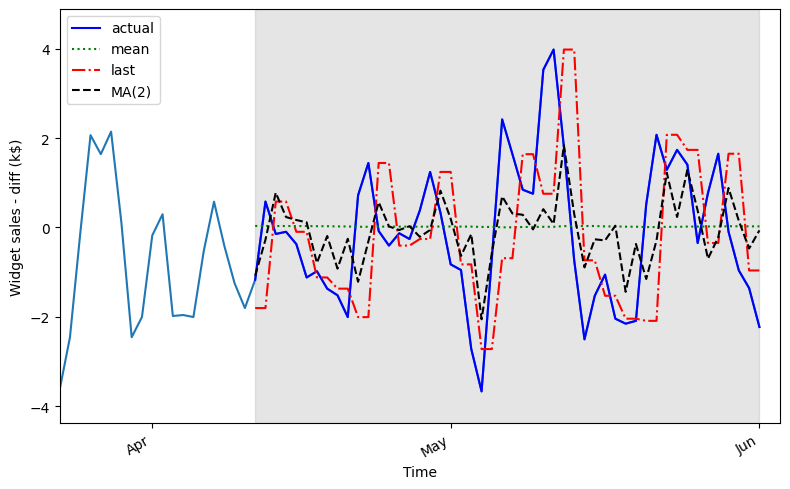

In [107]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(df_diff['widget_sales_diff'])
ax.plot(pred_df['widget_sales_diff'], 'b-', label='actual')
ax.plot(pred_df['pred_mean'], 'g:', label='mean')
ax.plot(pred_df['pred_last'], 'r-.', label='last')
ax.plot(pred_df['pred_MA'], 'k--', label='MA(2)')

ax.legend(loc=2)

ax.set_xlabel('Time')
ax.set_ylabel('Widget sales - diff (k$)')

ax.axvspan(449, 498, color='#808080', alpha=0.2)

ax.set_xlim(430, 500)

plt.xticks(
    [439, 468, 498],
    ['Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH04_F08_peixeiro.png', dpi=300)

### Evaluation using $MSE$

In [108]:
from sklearn.metrics import mean_squared_error

# Assuming 'pred_df' contains the actual 'widget_sales_diff' and predicted values for 'pred_mean', 'pred_last_value', and 'pred_MA'

# Calculate the MSE for each forecasting method
mse_mean = mean_squared_error(pred_df['widget_sales_diff'], pred_df['pred_mean'])
mse_last = mean_squared_error(pred_df['widget_sales_diff'], pred_df['pred_last'])
mse_MA = mean_squared_error(pred_df['widget_sales_diff'], pred_df['pred_MA'])

# Print the MSE values with three decimal places
print(f'MSE Mean: {mse_mean:.3f}, MSE Last: {mse_last:.3f}, MSE MA: {mse_MA:.3f}')


MSE Mean: 2.561, MSE Last: 3.249, MSE MA: 1.948


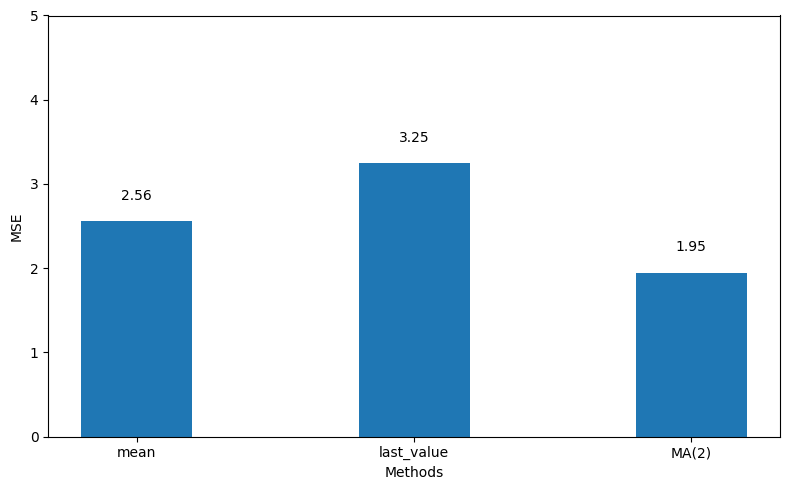

In [109]:
fig, ax = plt.subplots(figsize=(8,5))

x = ['mean', 'last_value', 'MA(2)']
y = [mse_mean, mse_last, mse_MA]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Methods')
ax.set_ylabel('MSE')
ax.set_ylim(0, 5)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.25, s=str(round(value, 2)), ha='center')

plt.tight_layout()

plt.savefig('figures/CH04_F09_peixeiro.png', dpi=300)

## Extend forecast to the actual data (Inverse the diff)

In [110]:
# Directly create 'pred_widget_sales' with NaN values for initialization
df['pred_widget_sales'] = pd.Series(index=df.index, dtype='float64')

# Ensure 'pred_MA' exists in pred_df and contains the forecasted values

# Calculate the base value for starting the reconstruction
base_value = df['widget_sales'].iloc[450]

# Reconstruct the forecasted sales and assign them to 'pred_widget_sales' starting from index 450
df['pred_widget_sales'][450:] = base_value + pred_df['pred_MA'].cumsum()


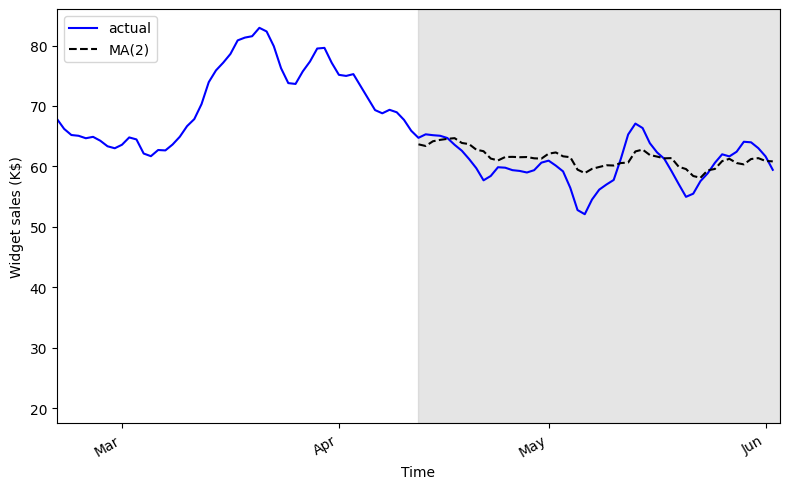

In [111]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(df['widget_sales'], 'b-', label='actual')
ax.plot(df['pred_widget_sales'], 'k--', label='MA(2)')

ax.legend(loc=2)

ax.set_xlabel('Time')
ax.set_ylabel('Widget sales (K$)')

ax.axvspan(450, 500, color='#808080', alpha=0.2)

ax.set_xlim(400, 500)

plt.xticks(
    [409, 439, 468, 498],
    ['Mar', 'Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH04_F11_peixeiro.png', dpi=300)

### Evaluation

In [112]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Calculating MAE and MAPE between actual and predicted widget sales from the 451st record onwards
mae_MA_undiff = mean_absolute_error(df['widget_sales'].iloc[450:], df['pred_widget_sales'].iloc[450:])
mape_MA_undiff = mean_absolute_percentage_error(df['widget_sales'].iloc[450:], df['pred_widget_sales'].iloc[450:])

# Printing the results with three decimal places and appending '%' for MAPE
print(f'MAE: {mae_MA_undiff:.3f}')
print(f'MAPE: {mape_MA_undiff:.3f}%')


MAE: 2.326
MAPE: 0.039%


## Summary
* A moving average process states that the present value is linearly dependent on the mean, present error term, and past error terms. The error terms are normally distributed.
* You can identify the order $q$ of a stationary moving average process by studying the $ACF$ plot. The coefficients are significant up until lag q only.
* You can predict up to $q$ steps into the future because the error terms are not observed in the data and must be recursively estimated.
* Predicting beyond $q$ steps into the future will simply return the mean of the series. To avoid that, you can apply rolling forecasts.
* If you apply a transformation to the data, you must undo it to bring your predictions back to the original scale of the data.
* The moving average model assumes the data is stationary. Therefore, you can only use this model on stationary data.